In [31]:
using CSV, Plots, DataFrames, Interpolations
## Input file
df_1 = DataFrame(CSV.File("dados_video1.csv"; delim="\t"));
df_2 = DataFrame(CSV.File("dados_video2.csv"; delim="\t"));
df_3 = DataFrame(CSV.File("dados_video3.csv"; delim="\t"));
df_4 = DataFrame(CSV.File("dados_video4.csv"; delim="\t"));

In [43]:
function lerp(df)
    itp_x = LinearInterpolation(df.t, df.x; extrapolation_bc=Flat());
    itp_y = LinearInterpolation(df.t, df.y; extrapolation_bc=Flat());
    itp_x, itp_y
end

itp_1_x, itp_1_y = lerp(df_1);
itp_2_x, itp_2_y = lerp(df_2);
itp_3_x, itp_3_y = lerp(df_3);
itp_4_x, itp_4_y = lerp(df_4);

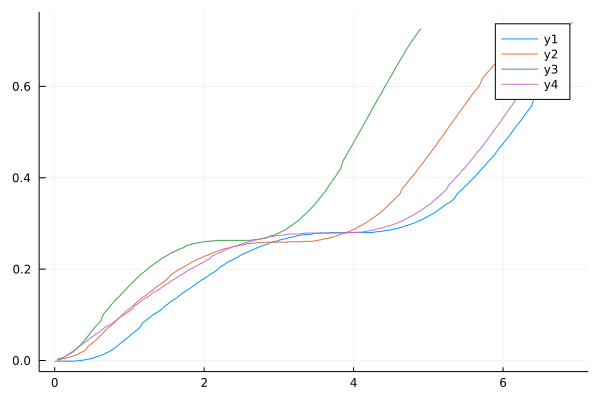

In [44]:
plot(df_1.t, df_1.x)
plot!(df_2.t, df_2.x)
plot!(df_3.t, df_3.x)
plot!(df_4.t, df_4.x)

┌ Info: Saved animation to 
│   fn = /home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15.gif
└ @ Plots /home/vini/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15.gif")
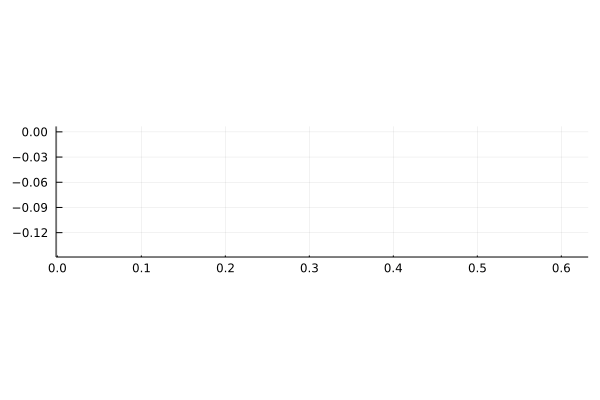

In [45]:
@userplot MyDataPlot
@recipe function f(cp::MyDataPlot)
    x, y, i = cp.args
    n = length(x)
    linewidth --> 1
    seriesalpha --> 1
    aspect_ratio --> 1
    label --> false
    x[1:i], y[1:i]
end

n = 150
t = range(0, maximum(df_1.t), length = n)
x = itp_1_x.(t)
y = itp_1_y.(t)

anim = @animate for i ∈ 1:n
    mydataplot(x, y, i, xlims=(minimum(x), maximum(x)), ylims=(minimum(y), maximum(y)))
end
gif(anim, "anim_fps15_1.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = /home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_2.gif
└ @ Plots /home/vini/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_2.gif")
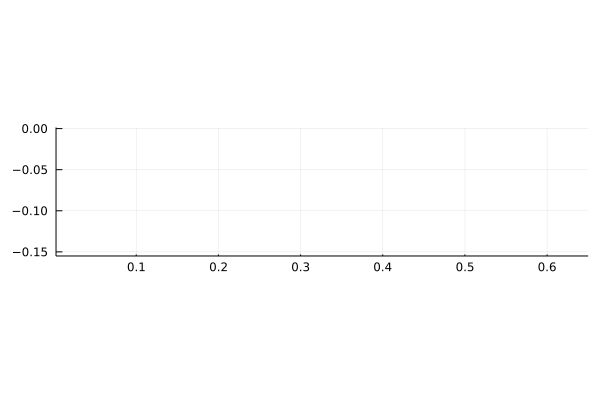

In [47]:
n = 150
t = range(0, maximum(df_2.t), length = n)
x = itp_2_x.(t)
y = itp_2_y.(t)

anim = @animate for i ∈ 1:n
    mydataplot(x, y, i, xlims=(minimum(x), maximum(x)), ylims=(minimum(y), maximum(y)))
end
gif(anim, "anim_fps15_2.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = /home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_3.gif
└ @ Plots /home/vini/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_3.gif")
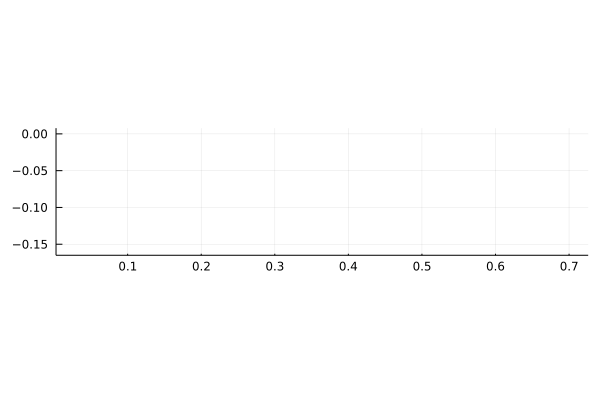

In [49]:
n = 150
t = range(0, maximum(df_3.t), length = n)
x = itp_3_x.(t)
y = itp_3_y.(t)

anim = @animate for i ∈ 1:n
    mydataplot(x, y, i, xlims=(minimum(x), maximum(x)), ylims=(minimum(y), maximum(y)))
end
gif(anim, "anim_fps15_3.gif", fps = 15)

┌ Info: Saved animation to 
│   fn = /home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_4.gif
└ @ Plots /home/vini/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/home/vini/Programming/julia_experiments/FIS-26 Braquistocrona/anim_fps15_4.gif")
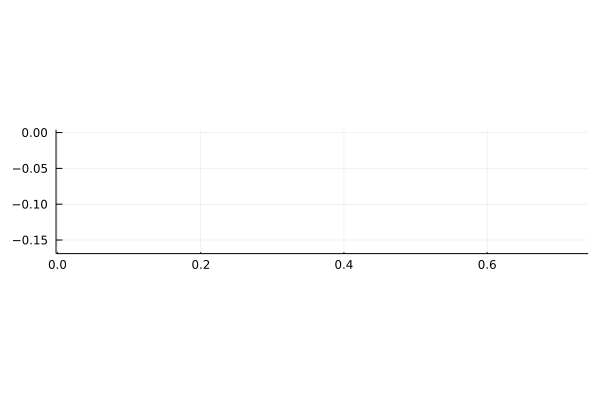

In [92]:
n = 150
t = range(0, maximum(df_4.t), length = n)
x = itp_4_x.(t)
y = itp_4_y.(t)

anim = @animate for i ∈ 1:n
    mydataplot(x, y, i, xlims=(minimum(x), maximum(x)), ylims=(minimum(y), maximum(y)))
end
gif(anim, "anim_fps15_4.gif", fps = 15)

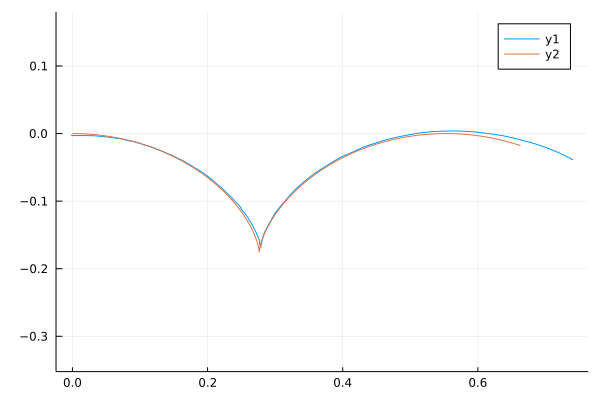

In [142]:
# Braquistócrona teórica
function Braquistocrona(R, y_0, ϕ₀, ω, t)
    x = R.*(t .+ sin.(t .+ ϕ₀));
    y = R.*(y_0 .+ cos.(t .+ ϕ₀));
    x, y
end

# Restrições:
ϕ₀ = 0.0;
y_0 = -1.0;
ω = 1.0; # Não muda o formato da curva

B_restrita(t, R) = Braquistocrona(R, y_0, ϕ₀, ω, t);

t = range(minimum(df_4.t), maximum(df_4.t), length=150);
x_T, y_T = B_restrita(t, 0.088);
plot(x, y, aspectratio=1)
plot!(x_T, y_T, aspectratio=1)

In [143]:
using LsqFit
# a two-parameter exponential model
# t: array of independent variables
# p: array of model parameters
# model(x, p) will accept the full data set as the first argument `t`.
# This means that we need to write our model function so it applies
# the model to the full dataset. We use `@.` to apply the calculations
# across all rows.
# p[1] = R

function f(t, R)
    x, _ = B_restrita(t, R)
    return x
end

model(t, p) = f(t, p[1])
p0 = [0.088];

function cfit(df)
    fit = curve_fit(model, df.t, df.x, p0);
    [coef(fit)[1], stderror(fit)[1]]
end

for i ∈ 1:4
    s = "cfit(df_$i)";
    ex = Meta.parse(s);
    m, σ = eval(ex);
    println("cfit_$i = $m ± $σ")
end


cfit_1 = 0.07963697561677627 ± 0.0008771779625766917
cfit_2 = 0.09632258283049068 ± 0.0013728864010715343
cfit_3 = 0.11973735077112742 ± 0.003208534161496308
cfit_4 = 0.08928073348519243 ± 0.0006128306758372896


In [144]:
stderror(fit)

1-element Vector{Float64}:
 0.0006128306758372896

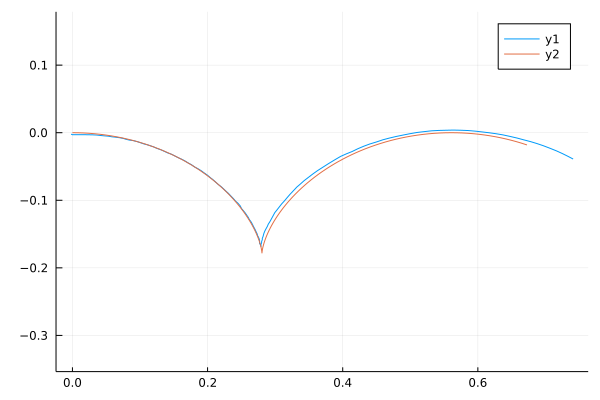

In [145]:
x_T, y_T = B_restrita(t, coef(fit)[1]);
plot(x, y, aspectratio=1)
plot!(x_T, y_T, aspectratio=1)